# Dataset 1 - Mortality from Leading Causes of Death
https://catalog.data.gov/dataset/nchs-potentially-excess-deaths-from-the-five-leading-causes-of-death

**Research Question:** Can regions or population groups be classified into high, medium, or low excess mortality risk categories based on data from the leading causes of death?

**Method Used:** CRISP-DM

**Classification Models:** KNN, DecisionTree, RandomForest


## Data Loading

In [1]:
# import relevant libraries for data analysis and visualisations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('white')

In [2]:
# read data from csv file
causes_df = pd.read_csv("NCHS_-_Potentially_Excess_Deaths_from_the_Five_Leading_Causes_of_Death.csv")

In [3]:
causes_df.head()

,Year,Cause of Death,State,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
0,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,All,756.0,3148377.0,451.0,305.0,40.3
1,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Metropolitan,556.0,2379871.0,341.0,217.0,39.0
2,2005,Cancer,Alabama,AL,4,0-49,2005 Fixed,Nonmetropolitan,200.0,768506.0,111.0,89.0,44.5
3,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,All,756.0,3148377.0,421.0,335.0,44.3
4,2005,Cancer,Alabama,AL,4,0-49,2010 Fixed,Metropolitan,556.0,2379871.0,318.0,238.0,42.8


In [4]:
# analyze data features
causes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205920 entries, 0 to 205919
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Year                               205920 non-null  int64  
 1   Cause of Death                     205920 non-null  object 
 2   State                              205920 non-null  object 
 3   State FIPS Code                    205920 non-null  object 
 4   HHS Region                         205920 non-null  int64  
 5   Age Range                          205920 non-null  object 
 6   Benchmark                          205920 non-null  object 
 7   Locality                           205920 non-null  object 
 8   Observed Deaths                    195708 non-null  float64
 9   Population                         200640 non-null  float64
 10  Expected Deaths                    195708 non-null  float64
 11  Potentially Excess Deaths          1957

In [5]:
# dataset statistical information
causes_df.describe()

,Year,HHS Region,Observed Deaths,Population,Expected Deaths,Potentially Excess Deaths,Percent Potentially Excess Deaths
count,205920.000000,205920.000000,195708.000000,2.006400e+05,195708.000000,195708.000000,195708.000000
mean,2010.000000,5.230769,2974.568490,7.008421e+06,2112.863092,875.121043,35.728369
std,3.162285,2.798464,17164.665931,2.861818e+07,13291.617895,4410.206402,18.810895
min,2005.000000,0.000000,10.000000,5.553600e+04,2.000000,0.000000,0.000000
25%,2007.000000,3.000000,155.000000,6.828258e+05,92.000000,41.000000,20.900000
50%,2010.000000,5.000000,508.000000,1.610936e+06,298.000000,159.000000,35.800000
75%,2013.000000,8.000000,1586.000000,4.681585e+06,1019.000000,543.000000,50.100000
max,2015.000000,10.000000,493526.000000,3.151317e+08,465126.000000,175703.000000,85.300000


In [6]:
# check for null values in dataset
causes_df.isnull().sum()

Year                                     0
Cause of Death                           0
State                                    0
State FIPS Code                          0
HHS Region                               0
Age Range                                0
Benchmark                                0
Locality                                 0
Observed Deaths                      10212
Population                            5280
Expected Deaths                      10212
Potentially Excess Deaths            10212
Percent Potentially Excess Deaths    10212
dtype: int64

In [7]:
# analyze unique values in each feature
causes_df.nunique()

Year                                    11
Cause of Death                           5
State                                   52
State FIPS Code                         52
HHS Region                              11
Age Range                                8
Benchmark                                3
Locality                                 3
Observed Deaths                       9249
Population                           13000
Expected Deaths                      12921
Potentially Excess Deaths             7807
Percent Potentially Excess Deaths      840
dtype: int64

In [8]:
# drop reoccuring State column
causes_df.drop(columns=['State'],inplace=True)

<Axes: >

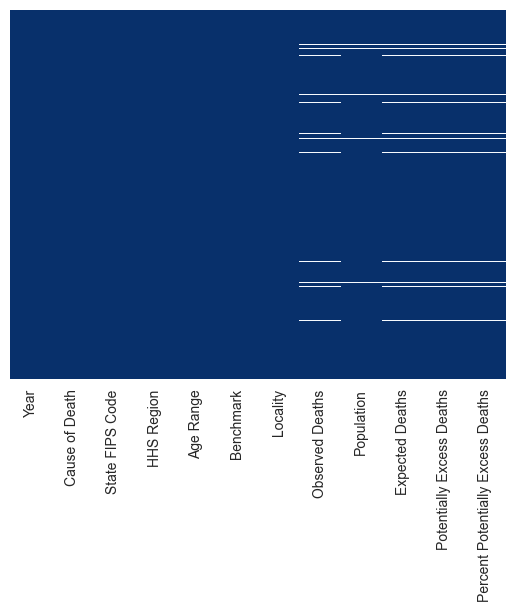

In [9]:
# display heatmap showing null values
sns.heatmap(causes_df.isnull(), cmap='Blues_r', yticklabels=False, cbar=False)

In [10]:
# display the number of rows and columns
causes_df.shape

(205920, 12)

In [11]:
# drop all rows with null values
causes_df.dropna(axis=0,inplace=True)

In [12]:
# ensure shape after dropping rows
causes_df.shape

(195708, 12)

In [13]:
# analyse feature names
causes_df.columns

Index(['Year', 'Cause of Death', 'State FIPS Code', 'HHS Region', 'Age Range',
       'Benchmark', 'Locality', 'Observed Deaths', 'Population',
       'Expected Deaths', 'Potentially Excess Deaths',
       'Percent Potentially Excess Deaths'],
      dtype='object')

## Data Understanding

In [14]:
# create color palette
sns.set_palette('Blues_r')

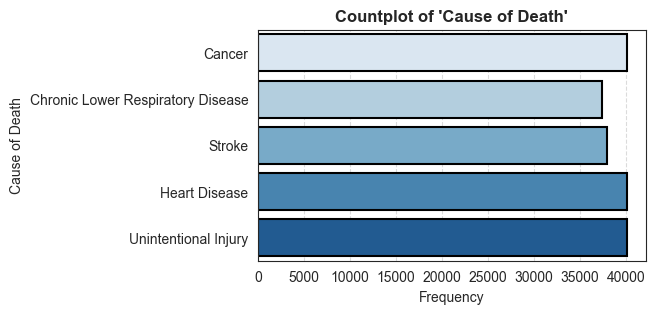

In [15]:
# countplot for 'Cause of Death'
plt.figure(figsize=(5, 3))
sns.countplot(data=causes_df, y="Cause of Death", hue="Cause of Death", palette=sns.color_palette("Blues", 5), edgecolor='black', linewidth=1.5)

plt.title("Countplot of 'Cause of Death'", fontsize=12, fontweight='bold')
plt.xlabel("Frequency", fontsize=10)
plt.ylabel("Cause of Death", fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

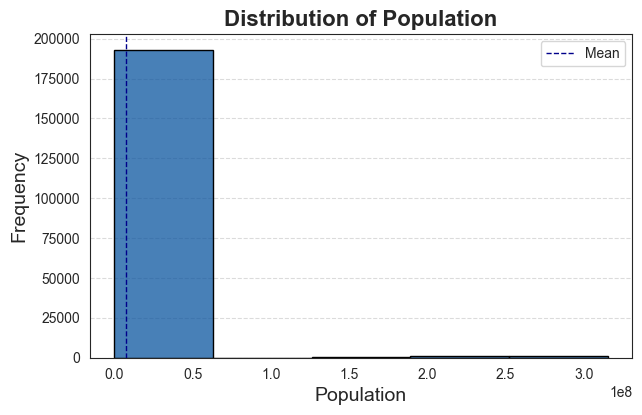

In [16]:
# histogram of 'Population'
plt.figure(figsize=(7, 4.2))
sns.histplot(data=causes_df, x='Population', bins=5, edgecolor='black')

plt.title("Distribution of Population", fontsize=16, fontweight='bold')
plt.xlabel("Population", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(causes_df['Population'].mean(), color='darkblue', linestyle='dashed', linewidth=1, label='Mean')
plt.legend(loc='best')
plt.show()

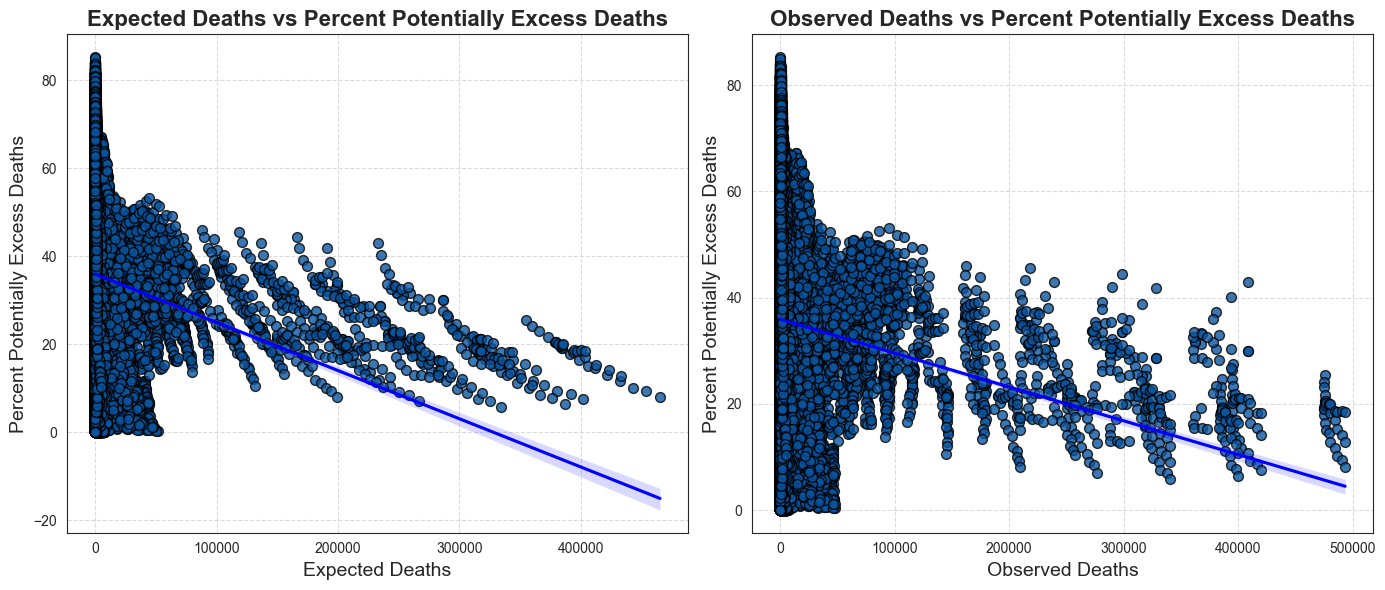

In [17]:
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
# scatter plot with regression line for 'Expected Deaths' vs 'Percent Potentially Excess Deaths'
sns.regplot(data=causes_df, x='Expected Deaths', y='Percent Potentially Excess Deaths', scatter_kws={'edgecolor': 'black', 's': 50}, line_kws={'color': 'blue'})
plt.title("Expected Deaths vs Percent Potentially Excess Deaths", fontsize=16, fontweight='bold')
plt.xlabel("Expected Deaths", fontsize=14)
plt.ylabel("Percent Potentially Excess Deaths", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1,2,2)
# scatter plot with regression line for 'Observed Deaths' vs 'Percent Potentially Excess Deaths'
sns.regplot(data=causes_df, x='Observed Deaths', y='Percent Potentially Excess Deaths', scatter_kws={'edgecolor': 'black', 's': 50}, line_kws={'color': 'blue'})
plt.title("Observed Deaths vs Percent Potentially Excess Deaths", fontsize=16, fontweight='bold')
plt.xlabel("Observed Deaths", fontsize=14)
plt.ylabel("Percent Potentially Excess Deaths", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

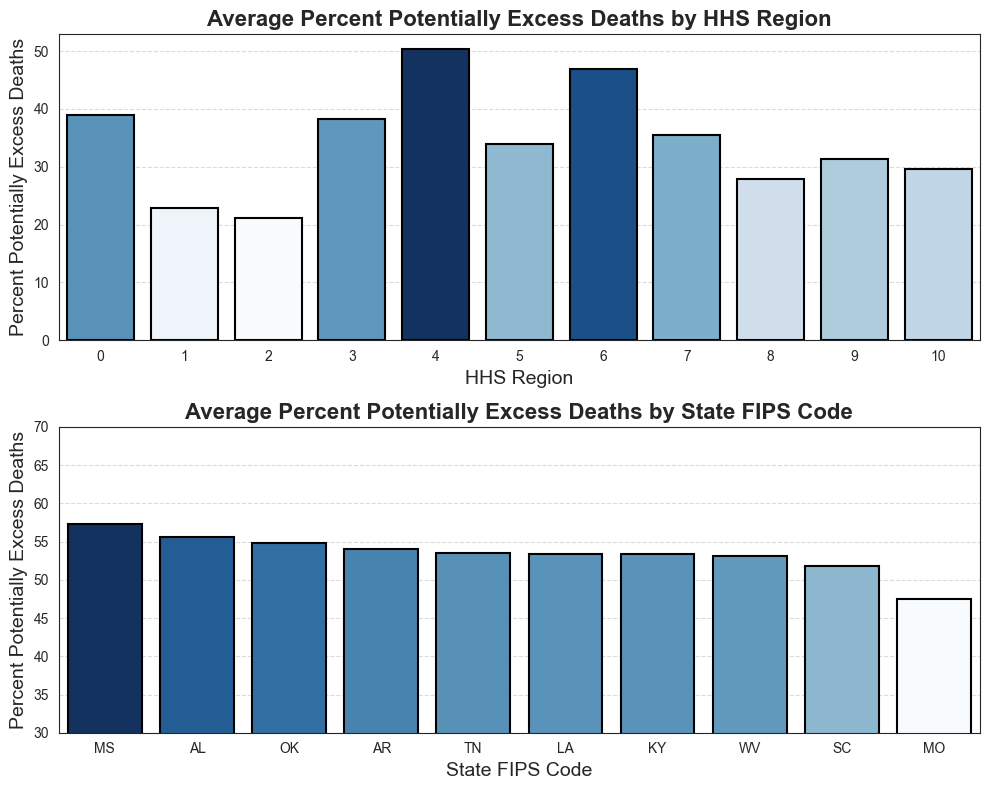

In [18]:
plt.figure(figsize=(10, 8))

plt.subplot(2,1,1)
# barplot for 'Percent Potentially Excess Deaths' by 'HHS Region'
hhs_df = causes_df.groupby(['HHS Region']).agg({'Percent Potentially Excess Deaths':'mean'}).reset_index().sort_values(by='Percent Potentially Excess Deaths', ascending=False)
sns.barplot(data=hhs_df, x='HHS Region', y='Percent Potentially Excess Deaths', hue='Percent Potentially Excess Deaths', palette='Blues', edgecolor='black', legend=False, linewidth=1.5)

plt.title("Average Percent Potentially Excess Deaths by HHS Region", fontsize=16, fontweight='bold')
plt.xlabel("HHS Region", fontsize=14)
plt.ylabel("Percent Potentially Excess Deaths", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2,1,2)
# barplot for 'Percent Potentially Excess Deaths' by 'State FIPS Code'
states_df = causes_df.groupby(['State FIPS Code']).agg({'Percent Potentially Excess Deaths':'mean'}).reset_index().sort_values(by='Percent Potentially Excess Deaths', ascending=False)
sns.barplot(data=states_df.head(10), x='State FIPS Code', y='Percent Potentially Excess Deaths', hue='Percent Potentially Excess Deaths', palette='Blues', edgecolor='black', legend=False, linewidth=1.5)

plt.title("Average Percent Potentially Excess Deaths by State FIPS Code", fontsize=16, fontweight='bold')
plt.xlabel("State FIPS Code", fontsize=14)
plt.ylabel("Percent Potentially Excess Deaths", fontsize=14)
plt.ylim([30,70])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

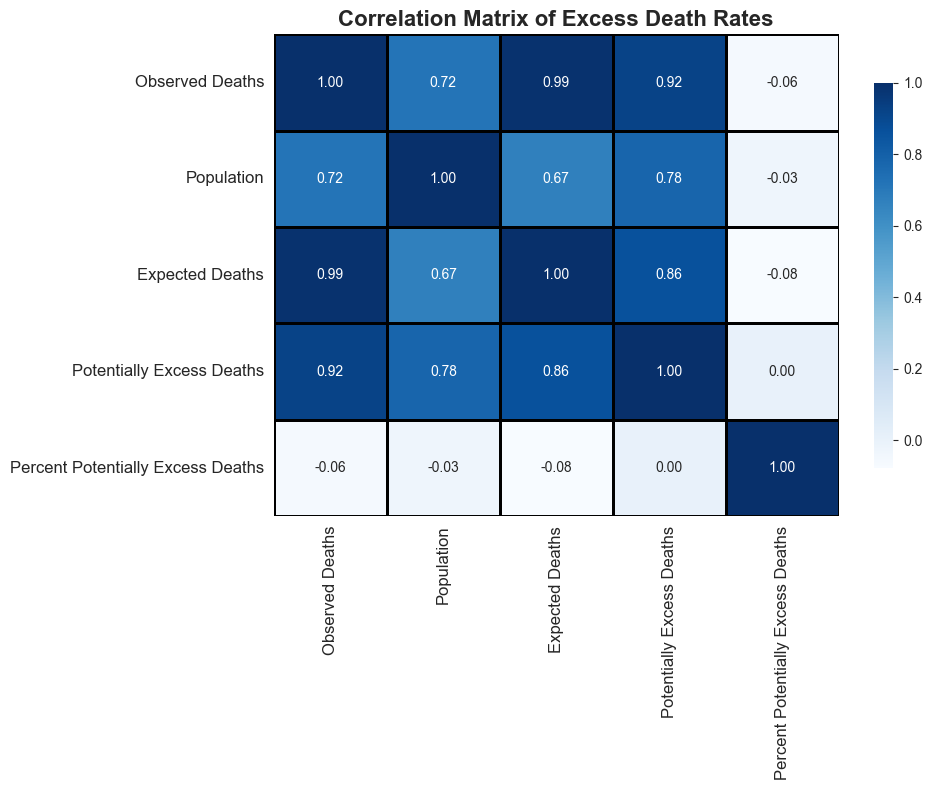

In [19]:
# correlation matrix for float columns in causes_df
corr_df = causes_df[[col for col in causes_df.columns if causes_df[col].dtype == "float"]].corr()

# heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='Blues', fmt='.2f', linewidths=0.8, linecolor='black', cbar_kws={"shrink": .8})

plt.title("Correlation Matrix of Excess Death Rates", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Data Preparation

In [20]:
# import libraries for feature encoding and scaling
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [21]:
# plotting the dictionary values
def dict_to_plot(dict, name, col):
    plt.figure(figsize=(10, 5))
    
    plt.plot(dict.keys(), dict.values(), color=col, linewidth=2)
    plt.title(f"{name} VS Neighbors", fontsize=16, fontweight='bold')
    plt.xlim(0, 16)
    plt.ylim(0, 1)
    plt.xlabel("Neighbor Number", fontsize=14)
    plt.ylabel(f"{name}", fontsize=14)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

In [22]:
# calculate the thresholds based on percentiles
high_threshold = causes_df['Percent Potentially Excess Deaths'].quantile(0.67)
medium_threshold = causes_df['Percent Potentially Excess Deaths'].quantile(0.33)

# functionm to set threshold for excess mortality rates
def thresholder(val):
    if val > high_threshold:
        return 1 # High
    elif val > medium_threshold:
        return 0 # Medium
    else:
        return -1 # Low

causes_df['Excess Death Rate'] = causes_df['Percent Potentially Excess Deaths'].apply(thresholder)
causes_df.drop(columns=['Year', 'Percent Potentially Excess Deaths', 'Potentially Excess Deaths'], inplace=True)
causes_df['Excess Death Rate'].value_counts()

Excess Death Rate
 0    66343
-1    64842
 1    64523
Name: count, dtype: int64

In [23]:
causes_df.head(3)

,Cause of Death,State FIPS Code,HHS Region,Age Range,Benchmark,Locality,Observed Deaths,Population,Expected Deaths,Excess Death Rate
0,Cancer,AL,4,0-49,2005 Fixed,All,756.0,3148377.0,451.0,0
1,Cancer,AL,4,0-49,2005 Fixed,Metropolitan,556.0,2379871.0,341.0,0
2,Cancer,AL,4,0-49,2005 Fixed,Nonmetropolitan,200.0,768506.0,111.0,0


In [24]:
# columns to one hot encode
categorical_features = ['Cause of Death', 'Age Range', 'Benchmark', 'Locality']
oneHotEnc = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
causes_df_oneHot = oneHotEnc.fit_transform(causes_df[categorical_features])
causes_df_oneHot = pd.DataFrame(causes_df_oneHot,columns=oneHotEnc.get_feature_names_out(categorical_features))

In [25]:
# merge one hot encoded columns with original dataframe
causes_df.reset_index(drop=True, inplace=True)
causes_df_oneHot.reset_index(drop=True, inplace=True)
causes_df = pd.concat([causes_df,causes_df_oneHot],axis=1).drop(columns=categorical_features)

In [26]:
# label encode the 'State FIPS Code' column
label_enc = LabelEncoder()
causes_df['State FIPS Code'] = label_enc.fit_transform(causes_df['State FIPS Code'])

In [27]:
# scale the numeric features through the standard scaler
numeric_features = ['Observed Deaths','Population','Expected Deaths']
standardScal = StandardScaler()
causes_df[numeric_features] = standardScal.fit_transform(causes_df[numeric_features])

In [28]:
# check the shape of the dataframe
causes_df.shape

(195708, 21)

In [29]:
causes_df.head(3)

,State FIPS Code,HHS Region,Observed Deaths,Population,Expected Deaths,Excess Death Rate,Cause of Death_Chronic Lower Respiratory Disease,Cause of Death_Heart Disease,Cause of Death_Stroke,Cause of Death_Unintentional Injury,...,Age Range_0-59,Age Range_0-64,Age Range_0-69,Age Range_0-74,Age Range_0-79,Age Range_0-84,Benchmark_2010 Fixed,Benchmark_Floating,Locality_Metropolitan,Locality_Nonmetropolitan
0,2,4,-0.129252,-0.139137,-0.125031,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,4,-0.140904,-0.165677,-0.133307,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,4,-0.161645,-0.221325,-0.150611,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Modeling and Evaluation

In [30]:
# import relevant libraries for machine learning
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, cohen_kappa_score

In [31]:
# function to plot the accuracy, f1 and Cohen's Kappa scores on the same plot
def plot_accuracy(acc_vals, f1_vals, cks_vals, x):
    plt.figure(figsize=(8, 5))
    plt.plot(acc_vals.keys(), acc_vals.values(), color=sns.color_palette('Blues',9)[2], linewidth=2, marker='x', markeredgecolor='black', label='Accuracy')
    plt.plot(f1_vals.keys(), f1_vals.values(), color=sns.color_palette('Blues',9)[5], marker='o', markeredgecolor='black', label='F1 Score')
    plt.plot(cks_vals.keys(), cks_vals.values(), color=sns.color_palette('Blues',9)[8], marker='*', markeredgecolor='black', label='Cohen')
    
    plt.title(f'Measure by {x}', fontsize=16, fontweight='bold')
    plt.xlabel(f'{x}', fontsize=14)
    plt.ylabel('Measure', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# plot confusion matrix as a heatmap    
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Medium', 'Low'], yticklabels=['High', 'Medium', 'Low'], 
                cbar=False, linewidths=0.5, linecolor='black')
    plt.xlabel('Predicted Excess Death Rate', fontsize=14)
    plt.ylabel('True Excess Death Rate', fontsize=14)
    plt.title(f'{model_name} Confusion Matrix', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# plot classification report as a heatmap    
def plot_classification_report(y_test, y_pred, model_name):
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    metrics = ['precision', 'recall', 'f1-score']

    heatmap_data = report_df[metrics].iloc[:-3]

    plt.figure(figsize=(8, 6))
    
    sns.heatmap(heatmap_data, annot=True, cmap='Blues', yticklabels=['High', 'Medium', 'Low'], fmt='.2f', cbar=True, annot_kws={"size": 12}, 
                linewidths=0.5, linecolor='black')
    
    plt.title(f'{model_name} Classification Report', fontsize=16, fontweight='bold')
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Excess Death Rate Categories', fontsize=14)
    
    plt.tight_layout()
    plt.show()

In [32]:
# main function to calculate error metrics needed to be evaluated
def calculate_metrics(y_test,y_pred,verbose=False):
    
    acc = round(accuracy_score(y_test,y_pred),8)
    f1 = round(f1_score(y_test,y_pred,average='weighted'),8)
    cks = round(cohen_kappa_score(y_test, y_pred), 8)
    
    if verbose:
        print(f"Accuracy Score: {acc}")
        print(f"F1 Score: {f1}")
        print(f"Cohen's Kappa Score: {cks}")
        print(" ")
    
    return acc,f1,cks

In [33]:
target = 'Excess Death Rate' # feature to be predicted

# set up the input and target features
X = causes_df.drop(columns=target)
y = causes_df[target]

In [34]:
# 80%-20% split for model training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((156566, 20), (39142, 20), (156566,), (39142,))

### k Nearest Neighbor (kNN)

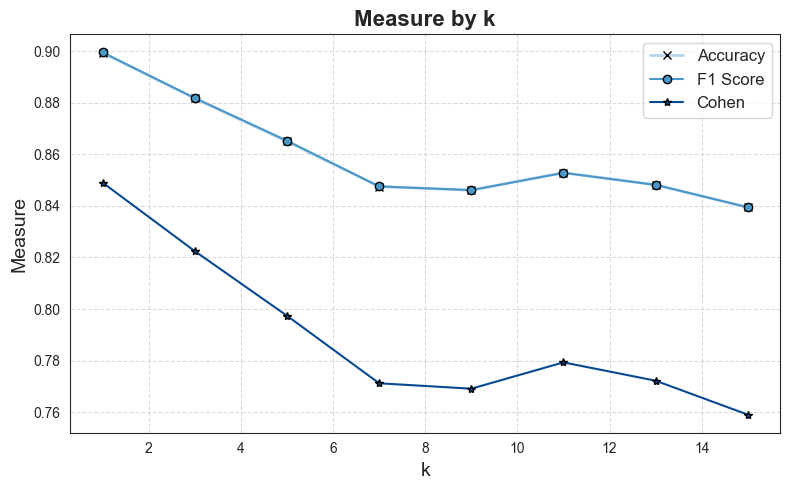

In [35]:
# classification using kNN with different k values
neighbor_vals = [1,3,5,7,9,11,13,15] # test set for k values

# hashmaps to store accuracy values
acc_vals = {}
f1_vals = {}
cks_vals = {}

for neighbor in neighbor_vals:
    knn = KNeighborsClassifier(n_neighbors=neighbor) # initialize model with k value
    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_test) # make predictions using the test set
    acc_vals[neighbor],f1_vals[neighbor],cks_vals[neighbor] = calculate_metrics(y_test,y_pred) # store metric values

# plot metric values on plot
plot_accuracy(acc_vals,f1_vals,cks_vals,'k')

### Decision Tree Classifier

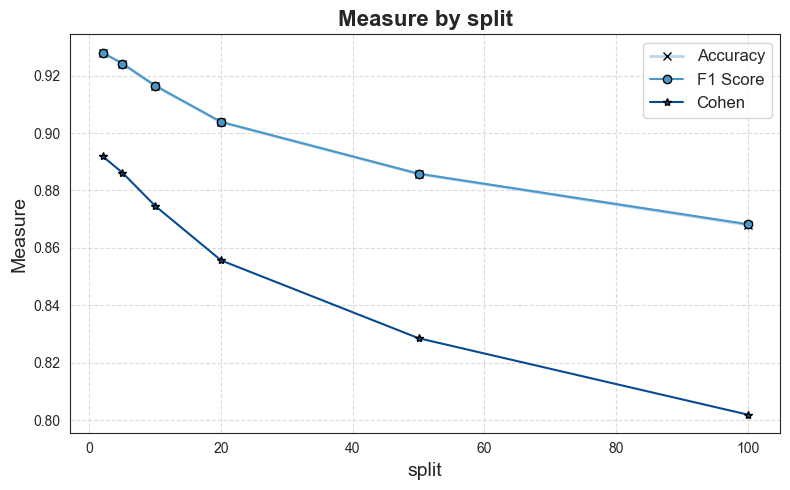

In [36]:
# classification using Decision Trees with different sample split values
min_samples_split = [2,5,10,20,50,100] # initialize model with sample split values

# hashmaps to store accuracy values
acc_vals = {}
f1_vals = {}
cks_vals = {}

for split in min_samples_split:
    dt = DecisionTreeClassifier(min_samples_split=split) # initialize model with sample split value
    dt.fit(X_train,y_train)
    
    y_pred = dt.predict(X_test) # make predictions using the test set
    acc_vals[split],f1_vals[split],cks_vals[split] = calculate_metrics(y_test,y_pred) # store metric values

# plot metric values on plot
plot_accuracy(acc_vals,f1_vals,cks_vals,'split')

### Random Forest Classifier

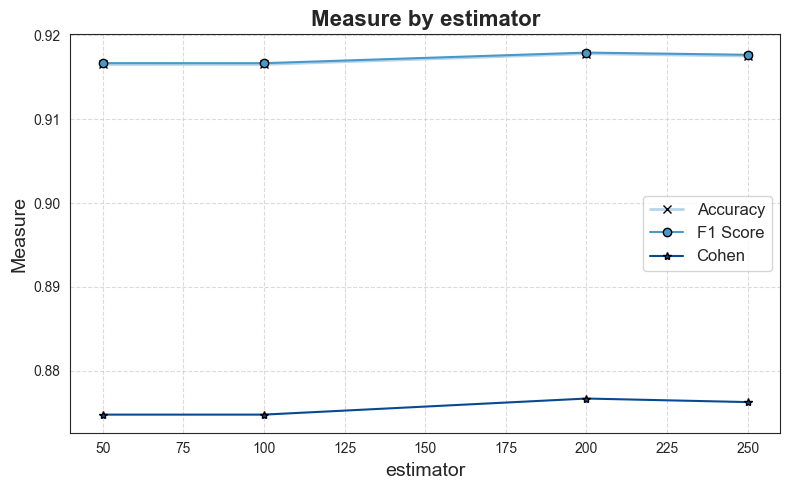

In [37]:
# classification using Random Forests with different estimator values
n_estimator = [50,100,200,250]

# hashmaps to store accuracy values
acc_vals = {}
f1_vals = {}
cks_vals = {}

for estimator in n_estimator:
    rfc = RandomForestClassifier(n_estimators=estimator) # initialize model with estimator value
    rfc.fit(X_train,y_train)
    
    y_pred = rfc.predict(X_test) # make predictions using the test set
    acc_vals[estimator],f1_vals[estimator],cks_vals[estimator] = calculate_metrics(y_test,y_pred) # store metric values
    
# plot metric values on plot
plot_accuracy(acc_vals,f1_vals,cks_vals,'estimator')

                 Importance
Observed Deaths    0.192377
Expected Deaths    0.188327
Population         0.156897
HHS Region         0.137422
State FIPS Code    0.103994


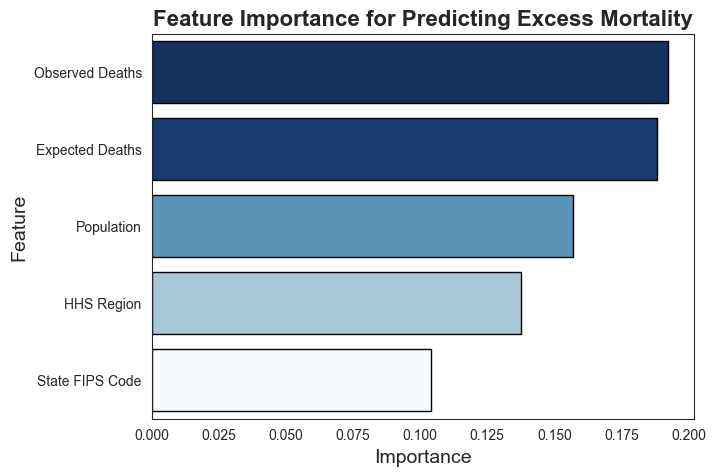

In [38]:
# feature Importance for Random Forest
importances = rfc.feature_importances_
feature_names = oneHotEnc.get_feature_names_out(categorical_features)

# combining feature names and importances
feature_importance_df = pd.DataFrame(importances, index=causes_df.drop(columns=[target]).columns, columns=["Importance"]).sort_values("Importance", ascending=False).head(5)

print(feature_importance_df)

plt.figure(figsize=(7, 5))
sns.barplot(data=feature_importance_df, x='Importance', y=feature_importance_df.index, hue='Importance', palette='Blues', edgecolor='black', legend=False)
plt.title('Feature Importance for Predicting Excess Mortality', fontsize=16, fontweight='bold')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

### Using GridSearchCV

In [39]:
# dictionary holding models with respective parameters for analysis
params = {
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 100, 200],
            'max_depth': [None, 5, 10]
        }
    }
}

Classification Report for knn:

              precision    recall  f1-score   support

          -1       0.89      0.91      0.90     12913
           0       0.83      0.83      0.83     13381
           1       0.93      0.90      0.92     12848

    accuracy                           0.88     39142
   macro avg       0.88      0.88      0.88     39142
weighted avg       0.88      0.88      0.88     39142

Confusion Matrix for knn:



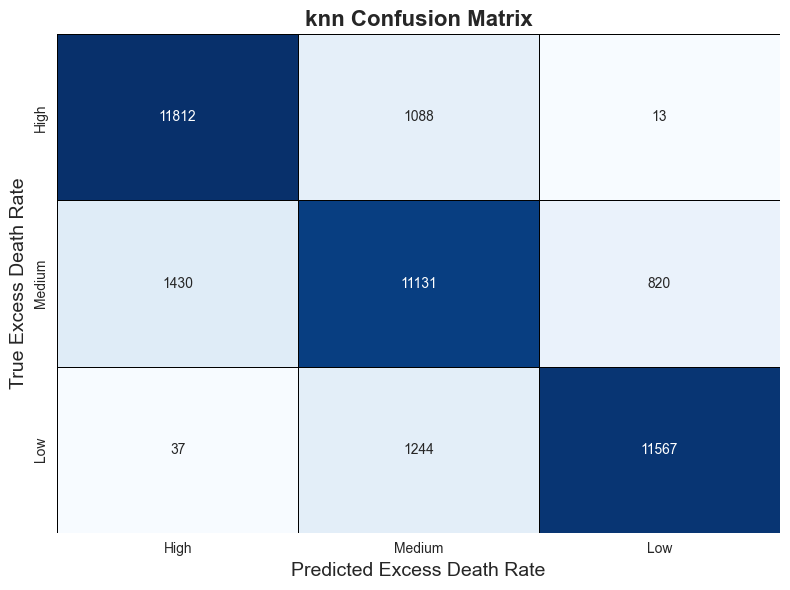



Classification Report for decision_tree:

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94     12913
           0       0.89      0.90      0.90     13381
           1       0.95      0.95      0.95     12848

    accuracy                           0.93     39142
   macro avg       0.93      0.93      0.93     39142
weighted avg       0.93      0.93      0.93     39142

Confusion Matrix for decision_tree:



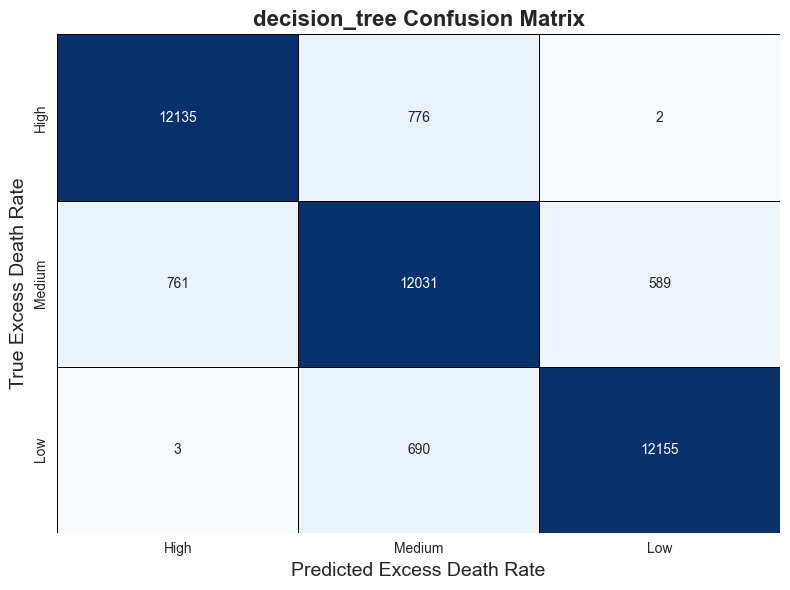



Classification Report for random_forest:

              precision    recall  f1-score   support

          -1       0.93      0.94      0.93     12913
           0       0.88      0.89      0.88     13381
           1       0.95      0.93      0.94     12848

    accuracy                           0.92     39142
   macro avg       0.92      0.92      0.92     39142
weighted avg       0.92      0.92      0.92     39142

Confusion Matrix for random_forest:



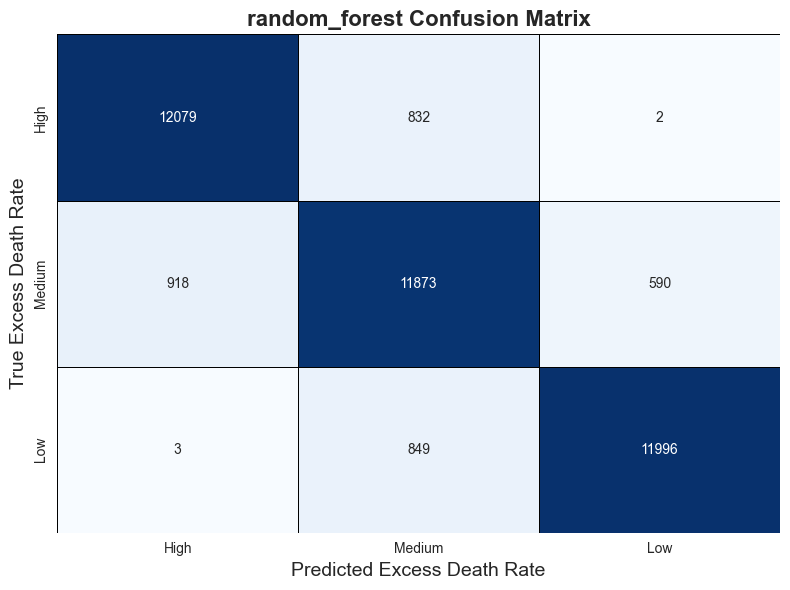

,model,best_score,best_params
1,decision_tree,0.921024,"{'max_depth': None, 'min_samples_split': 2}"
2,random_forest,0.911922,"{'max_depth': None, 'n_estimators': 200}"
0,knn,0.868924,{'n_neighbors': 3}


In [40]:
# list to store most accurate scores
scores = []

for model_name, mp in params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False) # apply grid search method to find most optimal parameters
    clf.fit(X_train, y_train) # fit the model on training data

    y_pred = clf.predict(X_test) # make predictions using the test set
    
    # store metric values
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test,y_pred))
    print(f"Confusion Matrix for {model_name}:\n")
    plot_confusion_matrix(y_test,y_pred,model_name)
    print("\n")

scores_df = pd.DataFrame(scores,columns=['model','best_score','best_params']).sort_values(by=['best_score'], ascending=False)
display(scores_df)